In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

file_path = "winequality-red.csv"

df = pd.read_csv(file_path, delimiter=';')

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 1

C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mateu\A

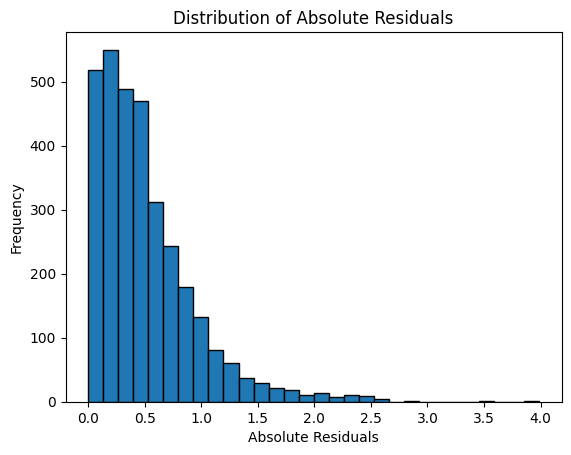

In [2]:
num_runs = 10
random_states = range(1, num_runs + 1)

residuals = []

mae_original = []
mae_values_rounded_bounded = []

for random_state in random_states:
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=random_state)
    
    mlp.fit(X_train, y_train)
    
    y_pred = mlp.predict(X_test)
    
    residuals.extend(np.abs(y_test - y_pred))
    
    # For question 2
    # Calculate MAE for original predictions
    mae_original.append(mean_absolute_error(y_test, y_pred))
    # Round and bound the estimates & calculate the MAE
    y_pred_rounded = np.round(y_pred)
    y_pred_rounded_bounded = np.clip(y_pred_rounded, 1, 10)
    mae_rounded_bounded = mean_absolute_error(y_test, y_pred_rounded_bounded)
    mae_values_rounded_bounded.append(mae_rounded_bounded)

plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Absolute Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Residuals')
plt.show()

# 2

In [3]:
# Calculate the average MAE for original predictions and rounded predictions
avg_mae_original = np.mean(mae_original)
avg_mae_rounded_bounded = np.mean(mae_values_rounded_bounded)

print(f"Average MAE without rounding and bounding: {avg_mae_original:.4f}")
print(f"Average MAE with rounding and bounding: {avg_mae_rounded_bounded:.4f}")

Average MAE without rounding and bounding: 0.5097
Average MAE with rounding and bounding: 0.4388


We can observe the Mean Absolute Error with rounding and bounding applied to the predictions is lower than the original prediction, sugesting this is a good improvement to apply.

# 3

C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mateu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mateu\AppD

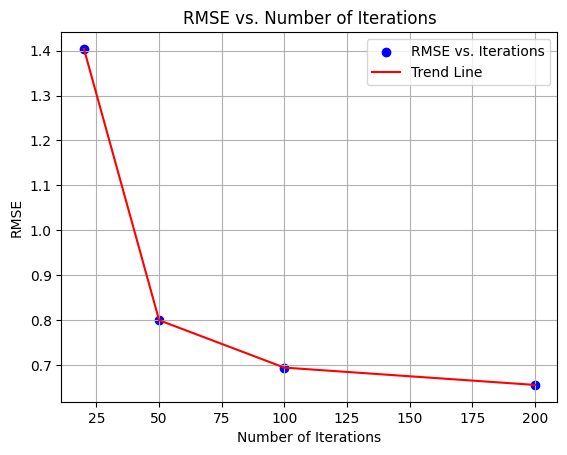

In [4]:
iteration_settings = [20, 50, 100, 200]

rmse_results = []

for iterations in iteration_settings:
    aux_rmse_results = []
    for random_state in random_states:
        mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', max_iter=iterations, validation_fraction=0.2, random_state=random_state)
        
        mlp.fit(X_train, y_train)
        
        y_pred = mlp.predict(X_test)
        
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        aux_rmse_results.append(rmse)
    
    rmse_results.append(np.mean(aux_rmse_results))
    
    
plt.scatter(iteration_settings, rmse_results, marker='o', color='b', label='RMSE vs. Iterations')
plt.plot(iteration_settings, rmse_results, linestyle='-', color='r', label='Trend Line')
plt.xlabel('Number of Iterations')
plt.ylabel('RMSE')
plt.title('RMSE vs. Number of Iterations')
plt.grid(True)
plt.legend()
plt.show()

# 4

The results show a clear trend as the number of iterations increases, the RMSE generally decreases, indicating better model performance.
Early stopping helps prevent overfitting by stopping training when the validation error starts to increase, preventing the model from over-optimizing on the training data, leading to better generalization. It can also save trining time which is most relevant in bigger models.
On the other hand, early stopping can worsen performance when a model stops learning before it has converged to the optimal solution (global minimum of the loss function), particularly relevant if the chosen number of iterations is too small, leading to underfitting, where the model lacks the complexity to capture the underlying patterns in the data effectively. If the validation set is not representative of the test data or is too small, early stopping may also stop training prematurely or continue training unnecessarily, leading to suboptimal performance.